### Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
%matplotlib inline

In [3]:
path = r"C:\Users\dioog\02. Bloomberg Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3.csv"))

In [5]:
df.shape

(4937, 32)

### Making a subsets of data set 

##### For the purpose of this exercise I decided to analyse the price variation of Apple Inc stock.

##### Analysing the price variation of one company fits the goal of this exercise.

In [6]:
# Creating a subset of the data relevent for time-series analysis

sub = df[['Short Name', '02/12/2019', '01/01/2020', '03/02/2020', '02/03/2020', '01/04/2020', '01/05/2020',
       '01/06/2020', '01/07/2020', '03/08/2020', '01/09/2020', '01/10/2020', '02/11/2020']]

In [7]:
sub.head()

,Short Name,02/12/2019,01/01/2020,03/02/2020,02/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020
0,APPLE INC,66.04,73.41,77.17,74.70,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77
1,SAUDI ARABIAN OI,0.00,9.36,9.05,8.74,8.13,8.42,8.76,8.72,8.80,9.40,9.53,9.12
2,MICROSOFT CORP,149.55,157.70,174.38,172.79,152.11,174.57,182.83,204.70,216.54,227.27,212.46,202.33
3,AMAZON.COM INC,1781.60,1847.84,2004.20,1953.95,1907.70,2286.04,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48
4,ALPHABET INC-A,1288.86,1339.39,1482.60,1386.32,1102.10,1317.32,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32


In [8]:
# Creating a sub-subset of the data of Apple Inc only

Apple = sub.loc[[0]]

In [9]:
Apple

,Short Name,02/12/2019,01/01/2020,03/02/2020,02/03/2020,01/04/2020,01/05/2020,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020
0,APPLE INC,66.04,73.41,77.17,74.7,60.23,72.27,80.46,91.03,108.94,134.18,116.79,108.77


In [10]:
# tranposing dataframe

Apple2 = Apple.T

In [11]:
# Deleting the first row

Apple3 = Apple2.drop(['Short Name'], axis=0)

In [12]:
# renaming column

Apple4 = Apple3.rename(columns={0: "price"})
Apple4

,price
02/12/2019,66.04
01/01/2020,73.41
03/02/2020,77.17
02/03/2020,74.7
01/04/2020,60.23
01/05/2020,72.27
01/06/2020,80.46
01/07/2020,91.03
03/08/2020,108.94
01/09/2020,134.18


### Creating a line chart 

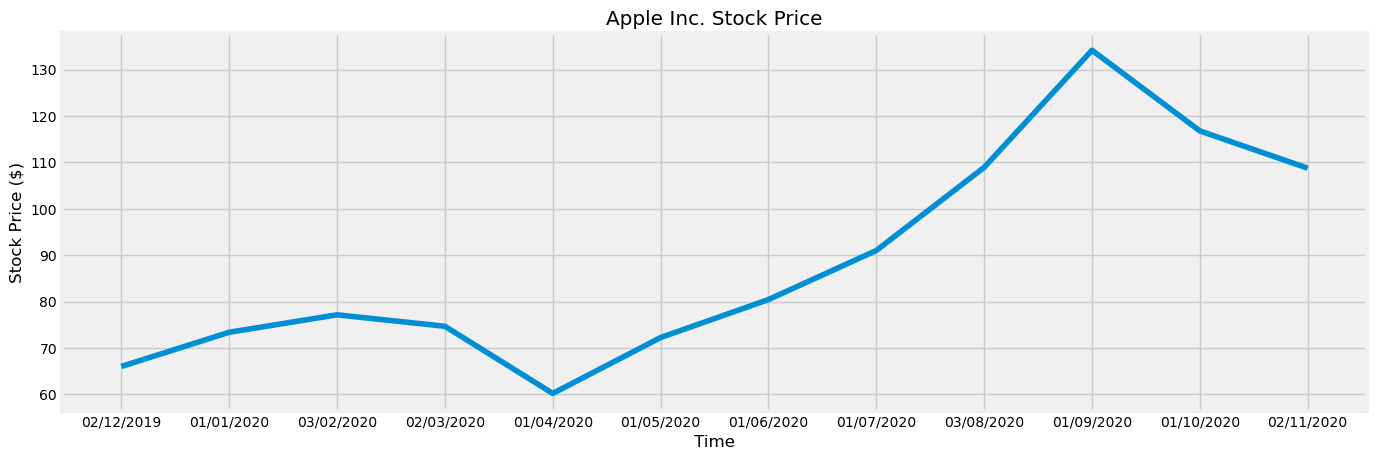

In [13]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.title('Apple Inc. Stock Price') # Label title.
plt.xlabel('Time') # Label x-axis.
plt.ylabel('Stock Price ($)') # Label y-axis.
plt.plot(Apple4)

### Decomposing the data’s components.

In [67]:
# Reset index so that you can use the "Date" column as a filter

Apple7 = Apple4.reset_index()
Apple7

,index,price
0,02/12/2019,66.04
1,01/01/2020,73.41
2,03/02/2020,77.17
3,02/03/2020,74.7
4,01/04/2020,60.23
5,01/05/2020,72.27
6,01/06/2020,80.46
7,01/07/2020,91.03
8,03/08/2020,108.94
9,01/09/2020,134.18


In [68]:
# renaming column

Apple7 = Apple7.rename(columns={'index': "Date"})
Apple7

,Date,price
0,02/12/2019,66.04
1,01/01/2020,73.41
2,03/02/2020,77.17
3,02/03/2020,74.7
4,01/04/2020,60.23
5,01/05/2020,72.27
6,01/06/2020,80.46
7,01/07/2020,91.03
8,03/08/2020,108.94
9,01/09/2020,134.18


In [70]:
# Setting the "Date" column as the index

from datetime import datetime

Apple7['datetime'] = pd.to_datetime(Apple7['Date'], dayfirst=True) # Create a datetime column from "Date.""
Apple7 = Apple7.set_index('datetime') # Set the datetime as the index of the dataframe.
Apple7.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
Apple7

,price
datetime,
2019-12-02,66.04
2020-01-01,73.41
2020-02-03,77.17
2020-03-02,74.7
2020-04-01,60.23
2020-05-01,72.27
2020-06-01,80.46
2020-07-01,91.03
2020-08-03,108.94


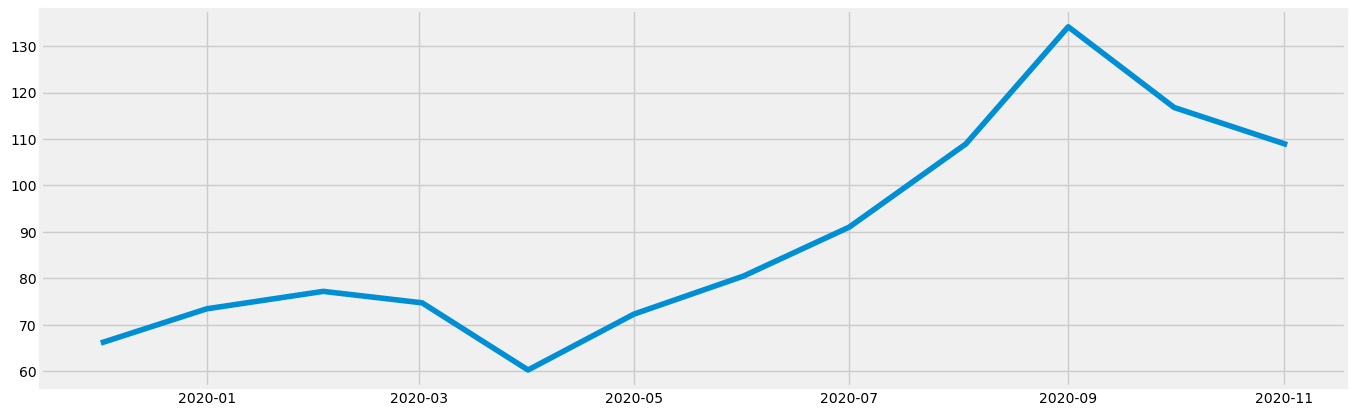

In [71]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Apple7)

In [73]:
# Decomposing the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(Apple7, model='additive', period=1)

In [74]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

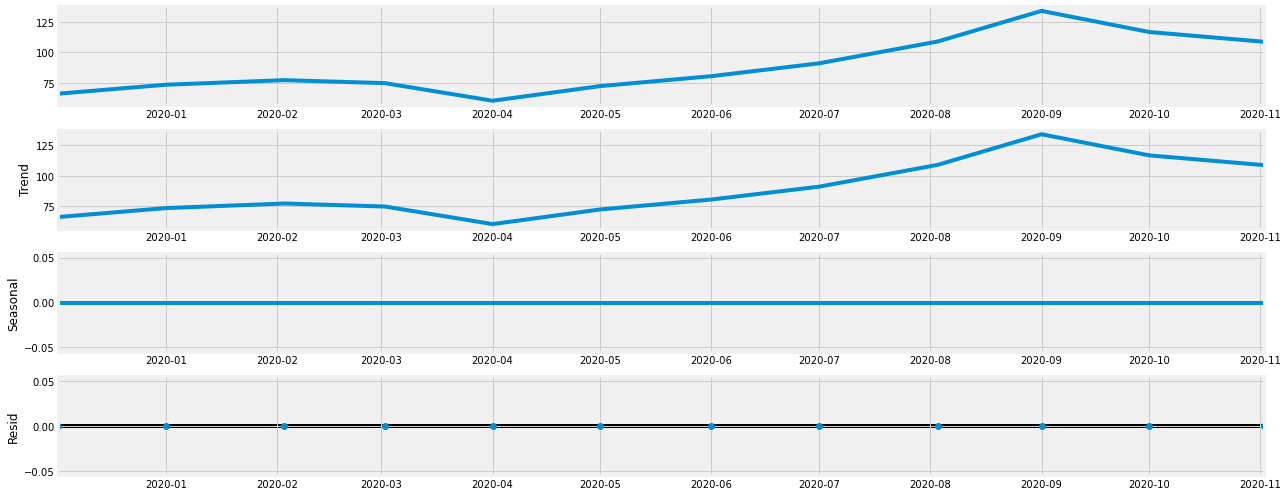

In [75]:
# Plot the separate components

decomposition.plot()
plt.show()

### comments:

##### The time series is non-stationary. There is a dominant upward trend, which was interrupted in two periods: between 3fev and 1Apr (the initial impact of COVID19) and from 1set to 2Nov.

##### No seasonality detected - the curve is flat. The period is also short for detecting seasonality.

##### The period between 3fev and 1Apr can be interpreted as a cycle because there was a generalized drop in the stock market due to the initial impact of COVID19.

##### The fact that this dataset only includes a datapoint per month eliminates the noise that characterizes daily stock price data.

### Conducting a Dickey-Fuller test to check for stationarity.

In [76]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(Apple7['price'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.955001
p-value                         0.769321
Number of Lags Used             0.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


### Interpretation: 

##### p-value = 0.77, which indicates the test result is non-significant. 

##### test statistic -0.955001 is higher than all critical values. 

##### This means the null hypothesis (there is a unit root) cannot be rejected. 

##### There is a unit root in the data

##### The data is non-stationary.

### Stationarizing the Data

In [78]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

data_diff = Apple7 - Apple7.shift(1) 

In [79]:
# Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

data_diff.dropna(inplace = True) 

In [80]:
data_diff

,price
datetime,
2020-01-01,7.37
2020-02-03,3.76
2020-03-02,-2.47
2020-04-01,-14.47
2020-05-01,12.04
2020-06-01,8.19
2020-07-01,10.57
2020-08-03,17.91
2020-09-01,25.24


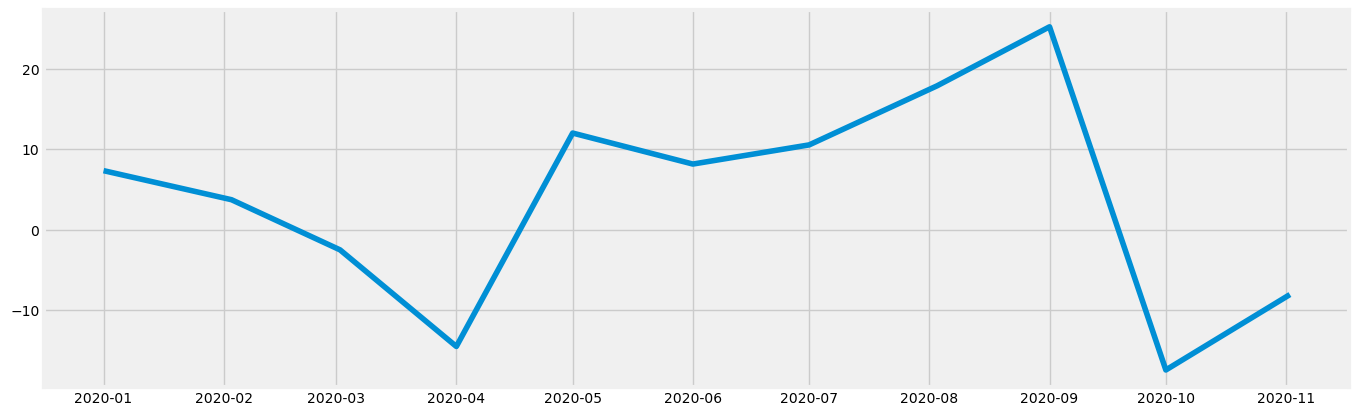

In [81]:
# plotting data_diff

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [82]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.349548
p-value                         0.156485
Number of Lags Used             0.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


### Interpretation: 

##### p-value = 0.15, which indicates the test result is non-significant. 

##### test statistic -2.349548 is still higher than all critical values. 

In [84]:
# performing another round of differencing 

data_diff2 = data_diff - data_diff.shift(1) 

In [85]:
# removing the missing values

data_diff2.dropna(inplace = True) 

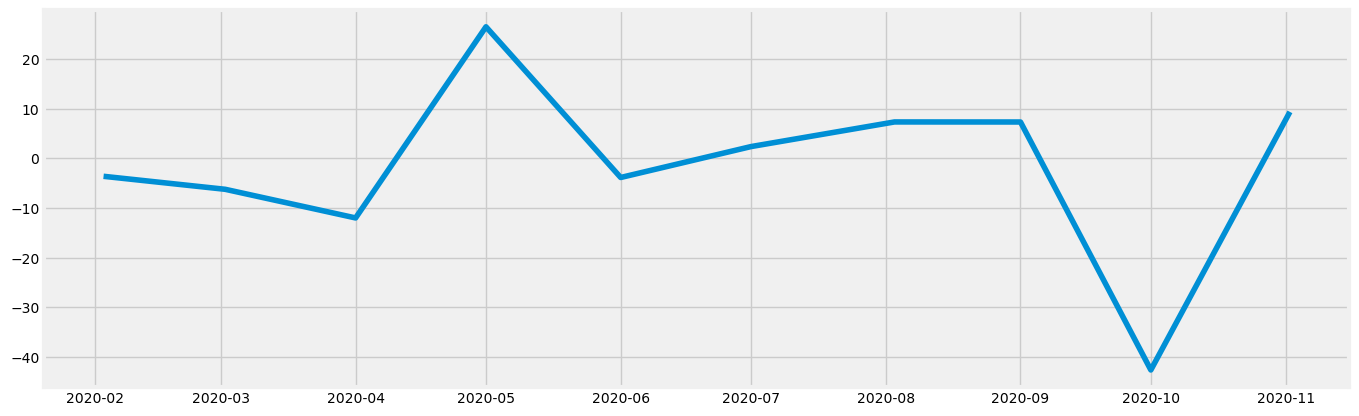

In [86]:
# plotting data_diff2

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [87]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                -3.767851
p-value                        0.003254
Number of Lags Used            0.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


### Interpretation:

##### test statistic  -3.767851 is now smaller than the critical value at both the five and ten percent significance levels. 

##### p-value 0.003254 < 0.05

##### We can reject the null hypothesis - This series is stationary.

### Checking data’s autocorrelations

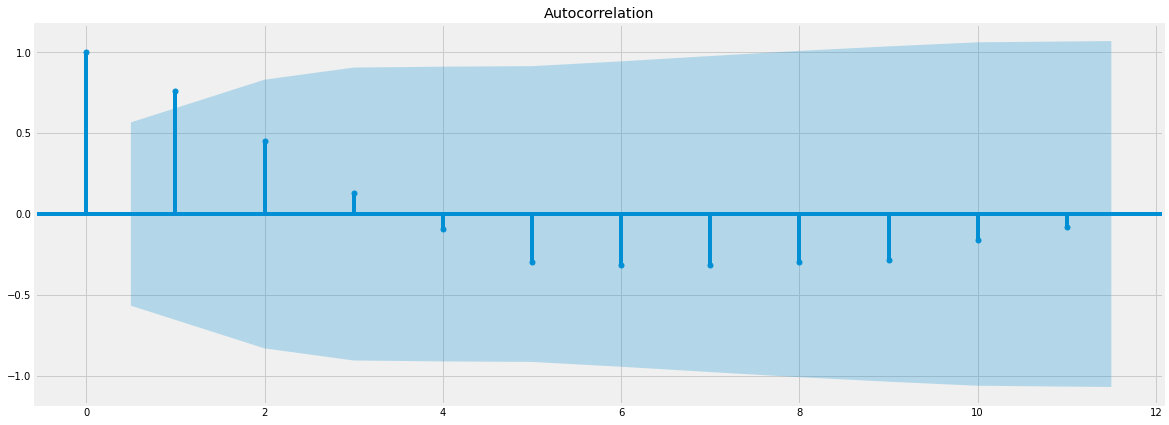

In [88]:
# plotting autocorrelations for non-stationary data-series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(Apple7)
plt.show()

###  Interpretation

##### There are 2 lags correlated with each other and we know this series is non-stationary, due to the result of the Dickey-Fuller test.

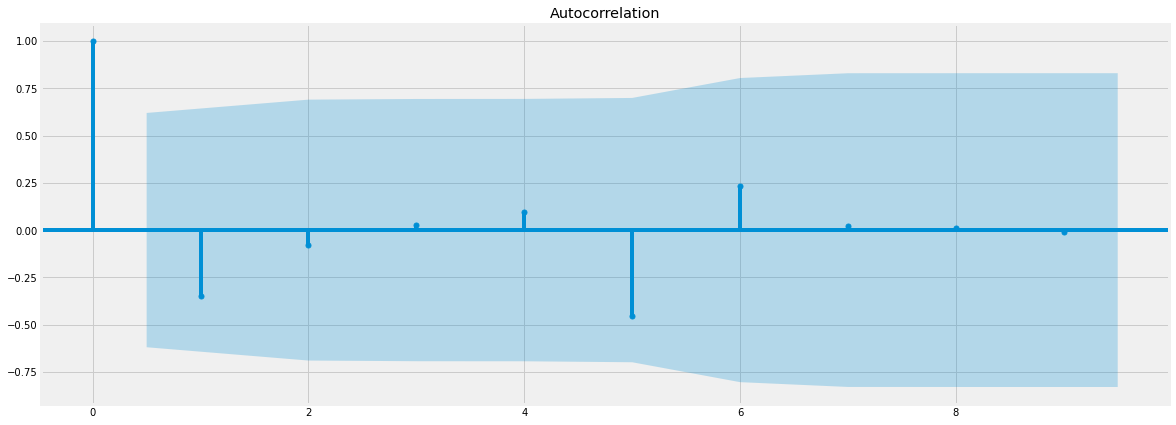

In [90]:
# plotting autocorrelations for stationary data-series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data_diff2)
plt.show()

###  Interpretation

##### There is one lag correlated with each other and we know this series is stationary, due to the result of the Dickey-Fuller test.

##### While the autocorrelation plot has improved slightly, it’s still not perfect. 

##### This means that, despite the Dickey-Fuller test saying that your data is stationary, that stationarity is weak.